# Pymaceuticals Inc.
---

### Analysis

- Ramicane can be observed as the most effective drug when looking at final tumor volume. However, Capomulin is almost just as effective of a drug. Cetamin, Infubinol, and Propriva have very a similar level of effectiveness when looking at the mean tumor volume. Ketapril, Naftisol, and Stelasyn have almost a non-existent level of effectiveness. Especailly when compared to the placebo drug regimen. The placebo drug regimen actually produced better results than Ketapril when looking at mean tumor volume.
 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseStudy = pd.merge(mouse_metadata, study_results, how ="left", on =["Mouse ID","Mouse ID"])

# Display the data table for preview
mouseStudy.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [65]:
# Checking the number of mice.
#https://stackoverflow.com/questions/38309729/count-unique-values-per-groups-with-pandas
micenum = mouseStudy['Mouse ID'].nunique()
micenum

249

In [66]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated
dupe = mouseStudy[mouseStudy.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]['Mouse ID'].unique()
dupe

array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe = mouseStudy[mouseStudy.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
id = 'g989'

mousestudy = mouseStudy[mouseStudy['Mouse ID'] != id]
mousestudy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice in the clean DataFrame.
mousestudy['Mouse ID'].nunique()

248

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumorMean = mousestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumorMedian = mousestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorVar = mousestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorStd = mousestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorSem = mousestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumordf = pd.DataFrame({'Mean of Tumor Vol':tumorMean,'Median of Tumor Vol':tumorMedian,
            'Variance of Tumor Vol':tumorVar,'Standard Deviation of Tumor Vol':tumorStd,
            'SEM of Tumor Vol':tumorSem})
tumordf

,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
tumordfAdv = mousestudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean','median'
                                                                           ,'var','std','sem'})
tumordfAdv

,std,mean,sem,var,median
Drug Regimen,,,,,
Capomulin,4.994774,40.675741,0.329346,24.947764,41.557809
Ceftamin,6.268188,52.591172,0.469821,39.290177,51.776157
Infubinol,6.567243,52.884795,0.492236,43.128684,51.820584
Ketapril,8.279709,55.235638,0.603860,68.553577,53.698743
Naftisol,8.134708,54.331565,0.596466,66.173479,52.509285
Placebo,7.821003,54.033581,0.581331,61.168083,52.288934
Propriva,6.622085,52.320930,0.544332,43.852013,50.446266
Ramicane,4.846308,40.216745,0.320955,23.486704,40.673236
Stelasyn,7.710419,54.233149,0.573111,59.450562,52.431737


## Bar and Pie Charts

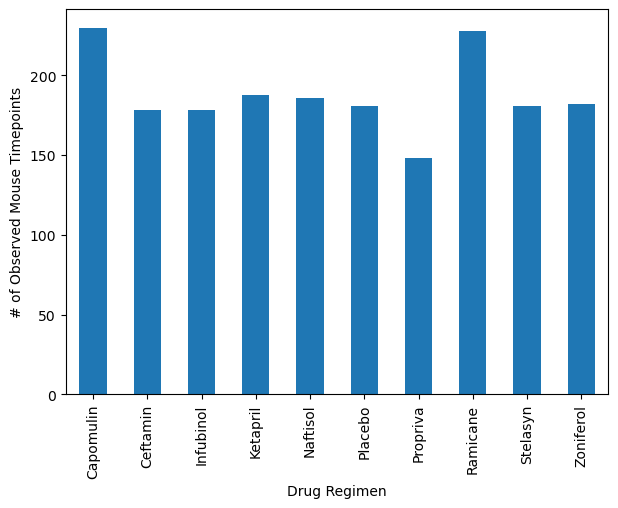

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug = mousestudy.groupby('Drug Regimen')
drugCount = drug['Drug Regimen'].count()
drugChart = drugCount.plot(kind='bar', figsize=(7,5))
drugChart.set_xlabel('Drug Regimen')
drugChart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

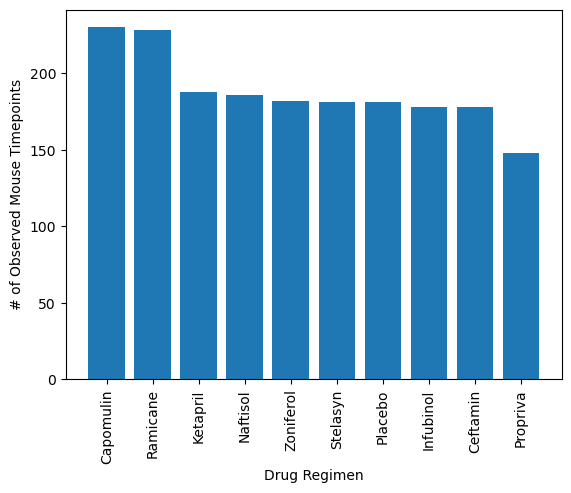

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


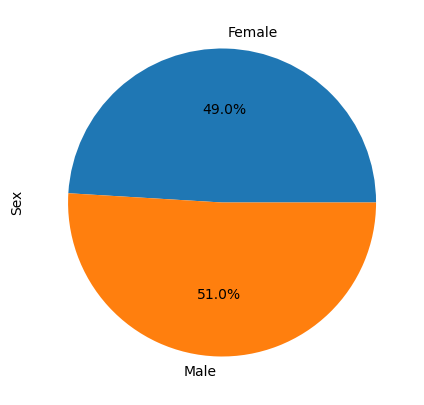

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mousestudy.groupby('Sex')
genderCount = gender['Sex'].count()
genderChart = genderCount.plot(kind = 'pie', subplots=True, autopct='%1.1f%%', figsize=(6,5))
plt.show()


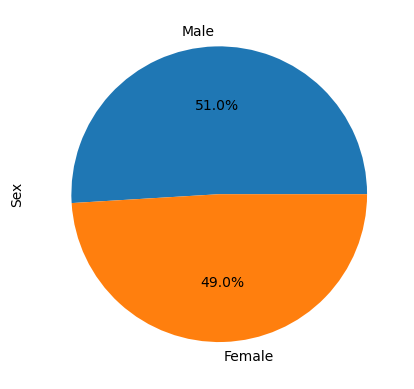

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [210]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capdf = mousestudy.loc[mousestudy["Drug Regimen"] == "Capomulin",:]
ramdf = mousestudy.loc[mousestudy["Drug Regimen"] == "Ramicane", :]
infdf = mousestudy.loc[mousestudy["Drug Regimen"] == "Infubinol", :]
ceft = mousestudy.loc[mousestudy["Drug Regimen"] == "Ceftamin", :]
df = pd.concat([capdf, ramdf, infdf, ceft])
# Start by getting the last (greatest) timepoint for each mouse
lastdf = df.loc[(df["Timepoint"] == 45) ,:]
lastdf
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# already merged df with .concat

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [214]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for x in treatment:
    tumors = lastdf.loc[lastdf['Drug Regimen']== x]
    tumorvol = tumors["Tumor Volume (mm3)"]
    quartiles = tumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - 1.5 * iqr
    upperbound = upperq + 1.5 * iqr
    print(f"{x}'s potential outliers are values less than {lowerbound} and values greater than {upperbound}.")

Capomulin's potential outliers are values less than 20.70456164999999 and values greater than 51.83201549.
Ramicane's potential outliers are values less than 19.69048010125 and values greater than 49.79900043125001.
Infubinol's potential outliers are values less than 55.35777559500001 and values greater than 75.08224443499999.
Ceftamin's potential outliers are values less than 52.29350701999999 and values greater than 76.66786758.


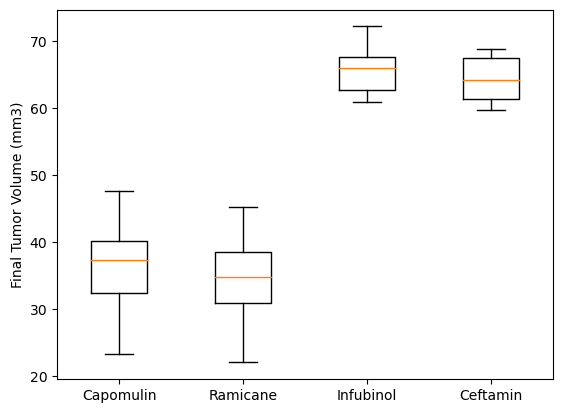

In [232]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumorvol2=[]
for y in treatment:
    tumors = lastdf.loc[lastdf['Drug Regimen']== y]
    tumorvolume = tumors["Tumor Volume (mm3)"]
    tumorvol2.append(tumorvolume)
flierprops = dict(marker='1', markerfacecolor='red', markersize=12, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(tumorvol2, labels=treatment, flierprops=flierprops)
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

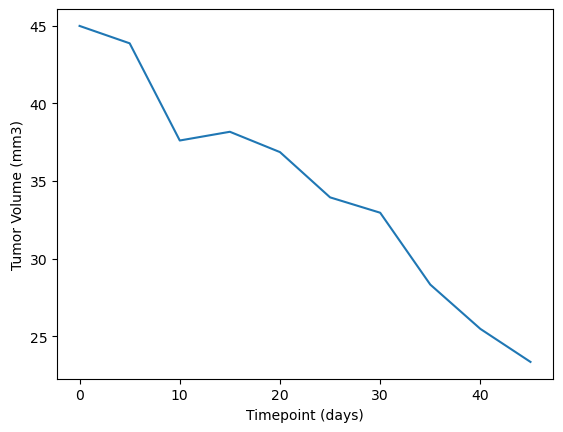

In [216]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capsingle = mousestudy.loc[mousestudy['Drug Regimen']== "Capomulin"]

singlemouse = capsingle.loc[capsingle['Mouse ID'] == "s185"]
xaxis = singlemouse["Timepoint"]
yaxis = singlemouse["Tumor Volume (mm3)"]
plt.plot(xaxis, yaxis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

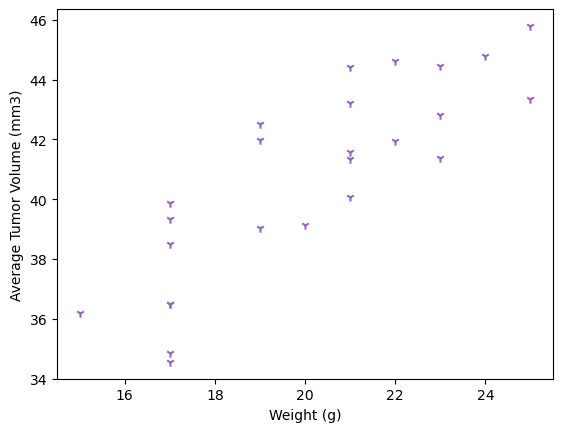

In [233]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

xaxis = capsingle.groupby("Mouse ID")["Weight (g)"].mean()
yaxis = capsingle.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(xaxis, yaxis, marker="1", facecolors="tab:purple")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


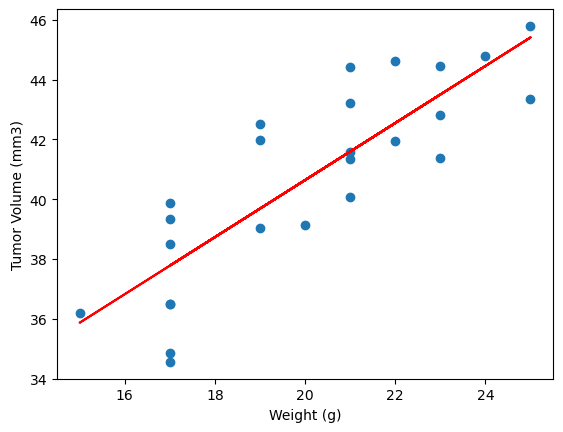

In [254]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capsingle.groupby("Mouse ID")["Weight (g)"].mean()
tumor = capsingle.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumor)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,tumor)
value = weight * slope + intercept
plt.plot(weight,value,"r-")
plt.scatter(weight,tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()